<a href="https://colab.research.google.com/github/benvictoria21/pandas/blob/master/HR_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [36]:
data_df = pd.read_csv("https://raw.githubusercontent.com/benvictoria21/pandas/master/dataset/HR_comma_sep.csv")
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [37]:
data_df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [38]:
def distplay(feature):
    sns.distplot(data_df[feature])
    
def catplay(feature):
    cat_counts = data_df[feature].value_counts()
    sns.barplot(cat_counts.index, cat_counts)
    print("Mean of %s: %.3f" % (feature, data_df[feature].mean()))
    print("Mode of %s: %.3f" % (feature, data_df[feature].mode()))

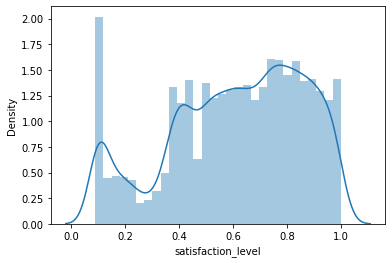

In [39]:
distplay('satisfaction_level')

# --> most of staff is satisfied with the job.

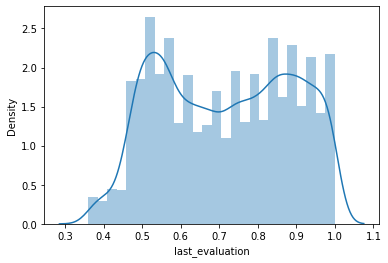

In [40]:
distplay('last_evaluation')

Mean of number_project: 3.803
Mode of number_project: 4.000


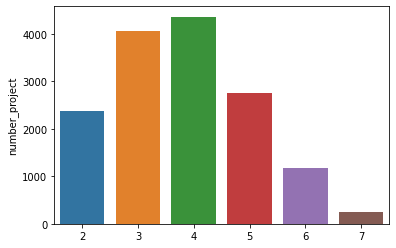

In [41]:
catplay("number_project")

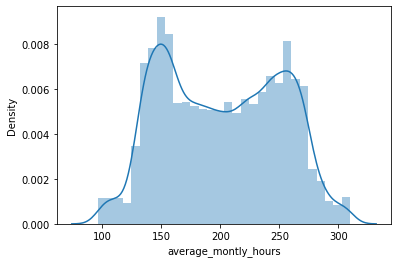

In [42]:
distplay('average_montly_hours')

Mean of time_spend_company: 3.498
Mode of time_spend_company: 3.000


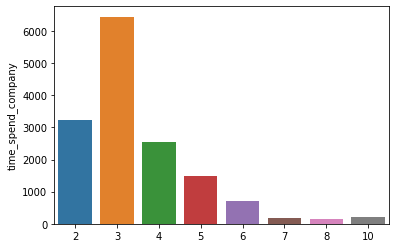

In [43]:
catplay("time_spend_company")

Mean of Work_accident: 0.145
Mode of Work_accident: 0.000


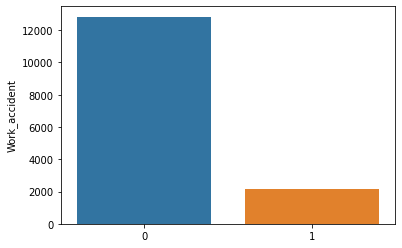

In [44]:
catplay("Work_accident")

Mean of left: 0.238
Mode of left: 0.000


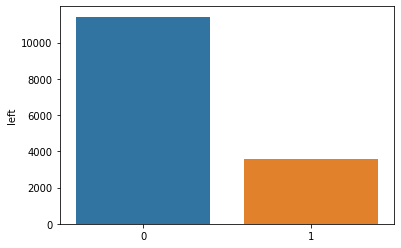

In [45]:
catplay("left")

Mean of promotion_last_5years: 0.021
Mode of promotion_last_5years: 0.000


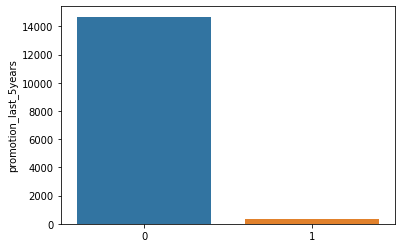

In [46]:
catplay("promotion_last_5years")

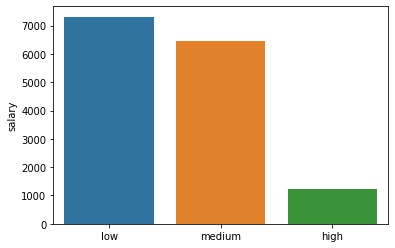

In [47]:
cat_counts = data_df['salary'].value_counts()
sns.barplot(cat_counts.index, cat_counts)

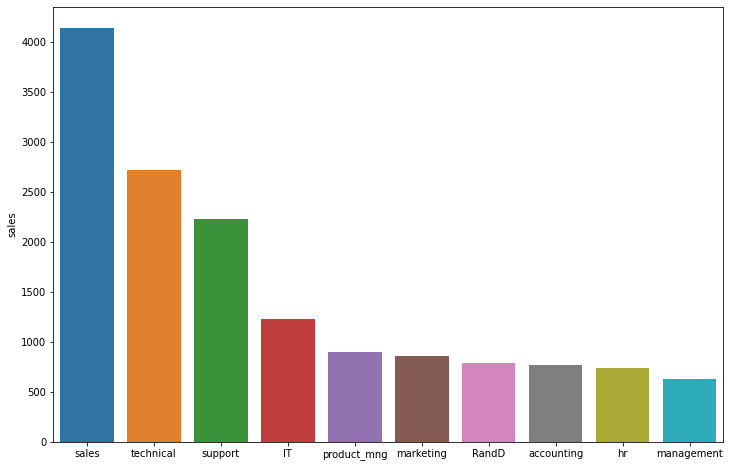

In [48]:
cat_counts = data_df['sales'].value_counts()
plt.figure(figsize=(12,8))
sns.barplot(cat_counts.index, cat_counts)

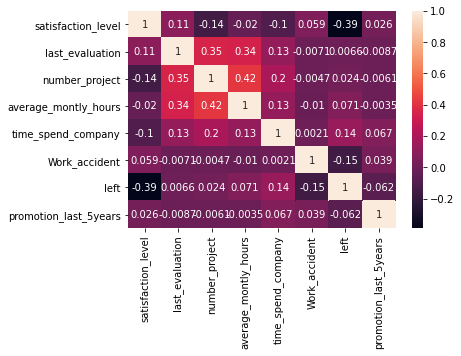

In [49]:
cor = data_df.corr()
sns.heatmap(cor, annot=True)

In [50]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [51]:
data_copy = data_df.copy()

In [52]:
col_list = ['satisfaction_level', 'last_evaluation']

for col in col_list:
    data_copy[col] = StandardScaler().fit_transform(data_copy[col].values.reshape(-1,1)).reshape(1,-1)[0]

In [53]:
col = ['average_montly_hours']
data_copy[col] = MinMaxScaler().fit_transform(data_copy[col].values.reshape(-1,1)).reshape(1,-1)[0]

In [54]:
data_copy['salary'] = data_copy['salary'].map({'low':0, 'medium':1, 'high': 2})

In [55]:
data_copy['sales'] = LabelEncoder().fit_transform(data_copy['sales'].values.reshape(-1,1))

In [56]:
data_copy.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,-0.936495,-1.087275,2,0.285047,3,0,1,0,7,0
1,0.752814,0.840707,5,0.775701,6,0,1,0,7,1
2,-2.022479,0.957554,7,0.822430,4,0,1,0,7,1
3,0.431041,0.899131,5,0.593458,5,0,1,0,7,0
4,-0.976716,-1.145699,2,0.294393,3,0,1,0,7,0


In [57]:
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [58]:
X = data_copy.drop('left', axis=1)
y = data_copy['left']

In [59]:
X.shape, y.shape

((14999, 9), (14999,))

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [61]:
models = [('KNN', KNeighborsClassifier(n_neighbors=3)), 
         ('GaussianNB', GaussianNB()),
         ('LinearSVC', LinearSVC(tol=1e-5))]

for name, clf in models:
    print("%s: train score: %.3f" % (name, cross_val_score(clf, X_train, y_train, cv=5).mean()))
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("Test performance: %.3f" % (1-mean_squared_error(y_pred, y_test)))

KNN: train score: 0.954
Test performance: 0.960
GaussianNB: train score: 0.788
Test performance: 0.804
LinearSVC: train score: 0.775
Test performance: 0.777
